

Install dependencies




In [19]:
# !pip install tensorflow-gpu==2.2 keras simpleitk matplotlib scikit-image pandas cupy

In [20]:
# pip uninstall tensorflow-gpu tensorflow keras

In [21]:
# pip install git+https://github.com/JihongJu/keras-resnet3d.git

Import Packages

In [22]:
import os
# os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   #if like me you do not have a lot of memory in your GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = "" #then these two lines force keras to use your CPU
# import keras
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
# from keras.layers import Dense, Dropout, Activation, Flatten, Lambda
# from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization as BN
# from keras.layers import GaussianNoise as GN
from tensorflow.keras.layers import Dense, Flatten, Conv3D, MaxPooling3D, MaxPool3D, GlobalAveragePooling3D, Dropout, Activation
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, CSVLogger
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.utils import Sequence
# from tensorflow.python.keras.utils import data_utils
from tensorflow.keras.utils import plot_model
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.util import montage 
# from skimage.util.montage import montage2d
import skimage.transform as skTrans
from skimage.transform import rotate
from skimage.transform import resize
# from sklearn import preprocessing
# import pandas as pd

from glob import glob

import SimpleITK as sitk
# import nibabel as nib

**Load and prepare data**

In [23]:
# from google.colab import drive
# drive.mount('/content/drive')

# project_dir = "drive/MyDrive/Colab Notebooks/TFM/DATA/"

project_dir = "/home/pmeslaf/TFM/DATA/FIRST_VISIT_DATA/"

In [24]:
# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
# config = tf.config.experimental.set_memory_growth(physical_devices[0], True)
# config = tf.config.experimental.set_memory_growth(physical_devices[1], True)

In [25]:
batch_size = 125
epochs = 100
shape=110
classes = ["MCI", "AD", "CN"]
num_classes = len(classes) 
n_channels = 1
images_shape = (shape,shape,int(shape), n_channels)

Custom Image Generator

In [26]:
from data_generator import DataGenerator

**Prepare data**

In [27]:
training_generator = DataGenerator(data_path=project_dir + '/Train/',
                                   dim=images_shape[:-1],
                                   batch_size = batch_size,
                                   n_channels = n_channels,
                                   classes = classes,
                                #    flip=True,
                                #    zoom=1.5,
                                #    rotation=10,
                                   shuffle=True)
valid_generator = DataGenerator(data_path=project_dir + '/Validation/',
                                   dim=images_shape[:-1],
                                   batch_size = batch_size,
                                   n_channels = n_channels,
                                   classes = classes,
                                   shuffle=True)
test_generator = DataGenerator(data_path=project_dir + '/Test/',
                                   dim=images_shape[:-1],
                                   batch_size = batch_size,
                                   n_channels = n_channels,
                                   classes = classes,
                                   shuffle=True)

2590 image(s) found in /home/pmeslaf/TFM/DATA/FIRST_VISIT_DATA//Train/
290 image(s) found in /home/pmeslaf/TFM/DATA/FIRST_VISIT_DATA//Validation/
63 image(s) found in /home/pmeslaf/TFM/DATA/FIRST_VISIT_DATA//Test/


In [28]:
# print('len ', str(training_generator.__len__()))
# print(type(training_generator.__len__()))
# print('len ', str(len(training_generator)))
# # X, y = training_generator.__getitem__(1)
# X, y = training_generator[1]
# # print(X[0,0,:,:,0])
# plt.imshow(X[0,:,:,65, 0], cmap='gray' )
# plt.show()
# plt.imshow(X[0,:,100,:, 0], cmap='gray' )
# plt.show()
# plt.imshow(X[0,60,:,:, 0], cmap='gray' )
# plt.show()

# print(type(training_generator))


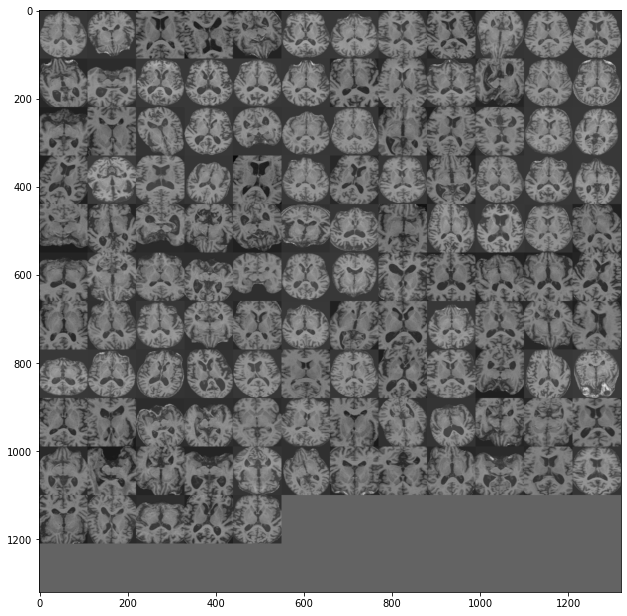

In [31]:
px = 1/plt.rcParams['figure.dpi']
X, y = training_generator[1]
# X = resize(X[:,5:-5,:,:], (X.shape[0], 36, X.shape[2], X.shape[3]))
fig, ax1 = plt.subplots(1, 1, figsize = (770*px,770*px))

ax1.imshow(montage(X[:,50,:,:,0]), cmap ='gray')
plt.show()
# plt.imshow(montage(X[1,:,:,:,0]), cmap ='gray')
# plt.show()
# plt.imshow(montage(X[2,:,:,:,0]), cmap ='gray')
# plt.show()
# plt.imshow(montage(X[3,:,:,:,0]), cmap ='gray')
# plt.show()

In [30]:
print(X[:,:,:,:,0].shape)

(125, 36, 110, 110)


In [ ]:
# print(X[0,14,:,:,0])
# print(X[10,14,:,:,0])
# print(X[7,14,:,:,0])
# print(X[34,14,:,:,0])

In [ ]:
# plt.imshow(X[0,:,:,50, 0], cmap='gray' )
# plt.show()
# plt.imshow(X[0,:,25,:, 0], cmap='gray' )
# plt.show()
# plt.imshow(X[0,60,:,:, 0], cmap='gray' )
# plt.show()

**MODEL**

In [ ]:
# from tensorflow.keras.models import Model
# sample_shape=(192,192,160,1)
# Create the model
# model = Sequential()
# model.add(Conv3D(32, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=sample_shape))
# model.add(MaxPooling3D(pool_size=(2, 2, 2)))
# model.add(BatchNormalization(center=True, scale=True))
# model.add(Dropout(0.5))
# # model.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform'))
# # model.add(MaxPooling3D(pool_size=(2, 2, 2)))
# # model.add(BatchNormalization(center=True, scale=True))
# # model.add(Dropout(0.5))
# model.add(Flatten())
# model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
# model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
# model.add(Dense(10, activation='softmax'))

# model.summary()


# from resnet3d import Resnet3DBuilder
# base_model = Resnet3DBuilder.build_resnet_18(
#     input_shape=sample_shape,
#     num_outputs=num_classes,
#     reg_factor=0.04
# )

# # add the final layers and compile
# fc_layer = tf.keras.layers.Dense(512, activation='relu')(base_model.layers[-2].output)
# fc_layer = tf.keras.layers.Dropout(0.8)(fc_layer)
# output_layer = tf.keras.layers.Dense(N_CLASSES, activation='softmax')(fc_layer)
# model = tf.keras.models.Model(inputs=base_model.input, outputs=output_layer)
# optimizer = tf.keras.optimizers.Adam(lr=0.00001)
# model.compile(optimizer=optimizer, 
#               loss='categorical_crossentropy', 
#               metrics=['acc'])

# # train the model
# model.fit(x=image_tensor, y=label_tensor, epochs=50, 
#           steps_per_epoch=STEPS_PER_EPOCH, 
#           validation_data=val_tensor, 
#           validation_steps=VALIDATION_STEPS)


# def get_model(width=192, height=192, depth=160):
#     """Build a 3D convolutional neural network model."""

#     inputs = keras.Input((width, height, depth, 1))

#     x = Conv3D(filters=64, kernel_size=3, activation="relu")(inputs)
#     x = MaxPool3D(pool_size=2)(x)
#     x = BatchNormalization()(x)

#     x = Conv3D(filters=64, kernel_size=3, activation="relu")(x)
#     x = MaxPool3D(pool_size=2)(x)
#     x = BatchNormalization()(x)

#     x = Conv3D(filters=128, kernel_size=3, activation="relu")(x)
#     x = MaxPool3D(pool_size=2)(x)
#     x = BatchNormalization()(x)

#     x = Conv3D(filters=256, kernel_size=3, activation="relu")(x)
#     x = MaxPool3D(pool_size=2)(x)
#     x = BatchNormalization()(x)

#     x = GlobalAveragePooling3D()(x)
#     x = Dense(units=512, activation="relu")(x)
#     x = Dropout(0.3)(x)

#     outputs = Dense(units=num_classes, activation="sigmoid")(x)

#     # Define the model.
#     model = keras.Model(inputs, outputs, name="3dcnn")
#     return model


# # Build model.
# model = get_model(width=192, height=192, depth=160)
# model.summary()

In [ ]:
# batch_size = 16
# epochs = 300
# # frozen_epochs = 100
# num_classes = 2
# shape=110
# images_shape = (shape,shape,int(shape))
# n_channels = 1


# project_dir = "/home/pmeslaf/TFM/DATA/"
# from data_generator import DataGenerator

# training_generator = DataGenerator(data_path=project_dir + '/Train/',
#                                    dim=images_shape,
#                                    batch_size = batch_size,
#                                    n_channels = n_channels,
#                                    num_classes=num_classes,
#                                    shuffle=True,
#                                    rotation=5)
# valid_generator = DataGenerator(data_path=project_dir + '/Validation/',
#                                    dim=images_shape,
#                                    batch_size = batch_size,
#                                    n_channels = n_channels,
#                                    num_classes=num_classes,
#                                    shuffle=True)
# test_generator = DataGenerator(data_path=project_dir + '/Test/',
#                                    dim=images_shape,
#                                    batch_size = batch_size,
#                                    n_channels = n_channels,
#                                    num_classes=num_classes,
#                                    shuffle=True)


# # # Create a callback that saves the model's weights
# checkpoint_path = project_dir + 'model_.{epoch:02d}-{val_loss:.6f}.m5'
# callbacks_list = [
#             # EarlyStopping(monitor='loss',
#             #               min_delta=0,
#             #               patience=2,
#             #               verbose=1,
#             #               mode='auto'),
#             ReduceLROnPlateau(monitor='val_loss',
#                               factor=0.1,
#                               patience=3,
#                               min_lr=0.000001,
#                               verbose=1),
#             ModelCheckpoint(filepath=checkpoint_path,
#                             # monitor='val_accuracy',
#                             # mode='max',
#                             monitor='val_loss',
#                             mode='min',
#                             verbose=1,
#                             save_best_only=True,
#                             save_weights_only = True),
#             CSVLogger( project_dir + 'training.log',
#                       separator=',',
#                       append=False)
#     ]



# # **MODEL**

# def CBGN(model,filters,lname,ishape=0):
#   if (ishape!=0):
#     model.add(Conv3D(filters=filters, kernel_size=3, activation="relu",
#                  input_shape=ishape))
#   else:
#     model.add(Conv3D(filters=filters, kernel_size=3, activation="relu"))

#   # model.add(MaxPool3D(pool_size=2,name=lname))
  
#   return model


# model = Sequential()

# model=CBGN(model,8,'conv_model_1',(images_shape[0], images_shape[1], images_shape[2], 1))
# model=CBGN(model,8,'conv_model_2')
# model.add(MaxPool3D(pool_size=2))
# model=CBGN(model,16,'conv_model_3')
# model=CBGN(model,16,'conv_model_4')
# model.add(MaxPool3D(pool_size=2))
# model=CBGN(model,32,'conv_model_5')
# model=CBGN(model,32,'conv_model_6')
# model=CBGN(model,32,'conv_model_7')
# model.add(MaxPool3D(pool_size=2))
# model=CBGN(model,64,'conv_model_8')
# model=CBGN(model,64,'conv_model_9')
# model=CBGN(model,64,'conv_model_10')
# model.add(MaxPool3D(pool_size=2))
# model.add(Flatten())
# model.add(Dense(units=128))
# model.add(BN())
# model.add(Dropout(0.5))
# model.add(Dense(units=64, activation="relu"))

# model.add(Dense(num_classes))
# model.add(Activation('softmax'))
# # model.add(Activation('sigmoid'))

# model.summary()

# opt = Adam(0.000001, decay=1e-6)


# # Compile the model
# model.compile(loss='categorical_crossentropy',
#               optimizer=opt,
#               metrics=['accuracy'])

In [ ]:
# plot_model(model, 
#            show_shapes = True,
#            show_dtype=False,
#            show_layer_names = True, 
#            rankdir = 'TB', 
#            expand_nested = False, 
#            dpi = 70)

In [ ]:
# from resnet3d import Resnet3DBuilder
# model = Resnet3DBuilder.build_resnet_50((images_shape[0], images_shape[1], images_shape[2], 1), num_classes)
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])
# model.fit(X_train, y_train, batch_size=32)

In [ ]:
# opt = Adam(0.000001, decay=1e-6)

In [ ]:
# # Compile the model
# model.compile(loss='categorical_crossentropy',
#               optimizer=opt,
#             #   metrics=['accuracy'])

In [ ]:
# model.load_weights(project_dir + 'model_.293-0.515146.m5')
#  # Fit data to model
# history = model.fit(x=training_generator,
#                     epochs=epochs,
#                     verbose=1,
#                     validation_data = test_generator)

In [ ]:
# history = pd.read_csv(project_dir + 'training.log', sep=',', engine='python')
# plt.plot(history['accuracy'])
# plt.plot(history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='upper left')
# plt.savefig(project_dir + 'evolution_training.png')


# predictions = model.evaluate(test_generator)
# # score = model.evaluate(x_test, y_test, verbose=0)

# print('Test loss:', predictions[0])
# print('Test accuracy:', predictions[1])
